## project 9727 
### Wenhao Chen 
### ZID:z5442760


In [1]:
# Loading the Data
import pandas as pd

# 将 CSV 文件导入为 DataFrame
spotify_df = pd.read_csv('spotify_dataset.csv',on_bad_lines='skip', quotechar='"')
song_df = pd.read_csv("spotify_millsongdata.csv",on_bad_lines='skip', quotechar='"')

spotify_df = spotify_df.dropna()
song_df = song_df.dropna()

# 打印前几行数据以确认导入成功
print(spotify_df.head())
print(song_df.head())

                            user_id                      "artistname"  \
0  9cc0cfd4d7d7885102480dd99e7a90d6                    Elvis Costello   
1  9cc0cfd4d7d7885102480dd99e7a90d6  Elvis Costello & The Attractions   
2  9cc0cfd4d7d7885102480dd99e7a90d6                      Tiffany Page   
3  9cc0cfd4d7d7885102480dd99e7a90d6  Elvis Costello & The Attractions   
4  9cc0cfd4d7d7885102480dd99e7a90d6                    Elvis Costello   

                                         "trackname"  "playlistname"  
0               (The Angels Wanna Wear My) Red Shoes  HARD ROCK 2010  
1  (What's So Funny 'Bout) Peace, Love And Unders...  HARD ROCK 2010  
2                                   7 Years Too Late  HARD ROCK 2010  
3                              Accidents Will Happen  HARD ROCK 2010  
4                                             Alison  HARD ROCK 2010  
  artist                   song                                        link  \
0   ABBA  Ahe's My Kind Of Girl  /a/abba/ahes+my+kind+of

In [2]:
spotify_df.columns = spotify_df.columns.str.replace('"', '').str.strip()

print(spotify_df.info())
print(song_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 12856831 entries, 0 to 12891679
Data columns (total 4 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   user_id       object
 1   artistname    object
 2   trackname     object
 3   playlistname  object
dtypes: object(4)
memory usage: 490.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB
None


In [19]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Define preprocessing function

def preprocess_text(text):
    if pd.isnull(text):
        return ""
    if not isinstance(text, str):
        return str(text)
    text = text.lower()
    text = re.sub(r'[^\w\s()-]', '', text)   #######################
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens] ####################
    return ' '.join(tokens) 

spotify_df['playlistname'] = spotify_df['playlistname'].apply(preprocess_text)
spotify_df['trackname'] = spotify_df['trackname'].apply(preprocess_text)
# spotify_df = spotify_df.applymap(preprocess_text)
song_df['text'] = song_df['text'].apply(preprocess_text)

print(spotify_df.head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\forsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\forsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\forsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                            user_id                        artistname  \
0  9cc0cfd4d7d7885102480dd99e7a90d6                    Elvis Costello   
1  9cc0cfd4d7d7885102480dd99e7a90d6  Elvis Costello & The Attractions   
2  9cc0cfd4d7d7885102480dd99e7a90d6                      Tiffany Page   
3  9cc0cfd4d7d7885102480dd99e7a90d6  Elvis Costello & The Attractions   
4  9cc0cfd4d7d7885102480dd99e7a90d6                    Elvis Costello   

                                       trackname    playlistname  
0                 ( angel wan na wear ) red shoe  hard rock 2010  
1  ( whats funny bout ) peace love understanding  hard rock 2010  
2                                    7 year late  hard rock 2010  
3                                accident happen  hard rock 2010  
4                                         alison  hard rock 2010  


In [15]:
import random
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(spotify_df, test_size=0.2, random_state=42)

# X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(train_df, test_df, test_size=0.3, random_state=42)

train_song_df, test_song_df = train_test_split(song_df, test_size=0.2, random_state=42)

# X_train_song, X_test_song, y_train_song, y_test_song = train_test_split(train_song_df, test_song_df, test_size=0.3, random_state=42)

# 获取随机10个用户的歌单列表
random_users = random.sample(list(train_df['user_id'].unique()), 10)
user_playlists = train_df[train_df['user_id'].isin(random_users)]

# 从用户歌单中随机提取10个不重复的歌单
unique_playlists = user_playlists[['playlistname']].drop_duplicates()
random_playlists = unique_playlists.sample(n=10, replace=False)
print("\n随机提取的10个不重复歌单 作为随机推荐:")
print(random_playlists)

# 基于关键词进行推荐
def recommend_playlists(keyword, df, top_n=10):
    keyword = preprocess_text(keyword)
    df['keyword_match'] = df['playlistname'].apply(lambda x: keyword in x)
    recommendations = df[df['keyword_match']].drop_duplicates(subset=['playlistname']).head(top_n)
    return recommendations['playlistname'].tolist()

# 示例关键词
keyword = "love"

# 推荐10条相关的 playlistname
recommendations = recommend_playlists(keyword, train_df)

print("\n基于关键词 '{}' 搜索歌单:".format(keyword))
for i, playlist in enumerate(recommendations, 1):
    print("{}. {}".format(i, playlist))



随机提取的10个不重复歌单 作为随机推荐:
                           playlistname
446964                          fitness
7233509         neil young harvest moon
447463                           script
8695698  chapter one ( deluxe version )
447609                           street
7231713                     grunge fuck
5707503                             ela
8067763       aleks syntek - mundo live
8695737                   indian summer
447200                       lily allen

基于关键词 'love' 搜索歌单:
1. peace love 2013
2. album love
3. lovely
4. love song
5. national sad song dirty lover
6. truth love
7. various artist 100 essential love song
8. love
9. opm love ballad
10. beres hammond one love one life


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics.pairwise import cosine_similarity

def extract_keywords(text):
    vectorizer = CountVectorizer(max_features=10)
    X = vectorizer.fit_transform([text])
    return vectorizer.get_feature_names_out()

# 为每个歌单获取10个关键词
playlist_keywords = {}
playlist_tracknames = {}
for playlist in random_playlists['playlistname']:
    tracknames = ' '.join(user_playlists[user_playlists['playlistname'] == playlist]['trackname'].tolist())
    keywords = extract_keywords(tracknames)
    playlist_keywords[playlist] = keywords
    playlist_tracknames[playlist] = tracknames

print("\n每个歌单的关键词:")
for playlist, keywords in playlist_keywords.items():
    print(f"{playlist}: {', '.join(keywords)}")

# 准备数据用于训练贝叶斯分类器
data = []
labels = []
for playlist, keywords in playlist_keywords.items():
    for keyword in keywords:
        data.append(keyword)
        labels.append(playlist)

# 使用 CountVectorizer 将关键词转换为特征向量
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data)
y = labels

# 使用 Multinomial Naive Bayes 训练模型
mnb = MultinomialNB()
mnb.fit(X, y)

# 基于输入关键词推荐新的歌单
def recommend_playlist_based_on_keyword(keyword, vectorizer, tracknames_dict, top_n=10):
    keyword_processed = preprocess_text(keyword)
    # X_new = vectorizer.transform([keyword_processed])
    # predicted_playlist = model.predict(X_new)[0]

    # 计算相似度
    input_vector = vectorizer.transform([keyword_processed])
    similarities = []
    for playlist, tracknames in tracknames_dict.items():
        playlist_vector = vectorizer.transform([tracknames])
        similarity = cosine_similarity(input_vector, playlist_vector)
        similarities.append((playlist, similarity[0][0]))

    # 根据相似度排序并推荐
    sorted_playlists = sorted(similarities, key=lambda x: x[1], reverse=True)
    recommended_playlists = [playlist for playlist, _ in sorted_playlists[:top_n]]
    return recommended_playlists

# 示例关键词
input_keyword = "love"

# 推荐基于输入关键词的新歌单
recommended_playlists = recommend_playlist_based_on_keyword(input_keyword, vectorizer, playlist_tracknames)
print(f"\n基于关键词 '{input_keyword}' 的推荐歌单:")
for i, playlist in enumerate(recommended_playlists, 1):
    print(f"{i}. {playlist}")


每个歌单的关键词:
fitness: bad, boys, feeling, gotta
neil young harvest moon: and, man, of, old, one, such, these, to, unknown, war
script: 83, at, digital, feat, instrumental, live, of, remaster, script, the
chapter one ( deluxe version ): 1996, billie, five, ghost, glow, hard, holiday, man, mirror, tattoos
street: have, it, name, no, of, out, streets, the, to, you
grunge fuck: and, black, in, me, my, of, on, the, to, you
ela: from, girl, ipanema, stereo, the, version
aleks syntek - mundo live: 08, auditorio, de, el, live, nacional, sobre, soñé, te, ti
indian summer: indian, summer
lily allen: at, ldn, live, of, radio, remix, smile, the, version, you

基于关键词 'love' 的推荐歌单:
1. fitness
2. neil young harvest moon
3. script
4. chapter one ( deluxe version )
5. street
6. grunge fuck
7. ela
8. aleks syntek - mundo live
9. indian summer
10. lily allen


In [22]:
print(song_df.head())

  artist                   song                                        link  \
0   ABBA  Ahe's My Kind Of Girl  /a/abba/ahes+my+kind+of+girl_20598417.html   
1   ABBA       Andante, Andante       /a/abba/andante+andante_20002708.html   
2   ABBA         As Good As New        /a/abba/as+good+as+new_20003033.html   
3   ABBA                   Bang                  /a/abba/bang_20598415.html   
4   ABBA       Bang-A-Boomerang      /a/abba/bang+a+boomerang_20002668.html   

                                                text  
0  look face wonderful face mean something specia...  
1  take easy please touch gently like summer even...  
2  ill never know go put lousy rotten show boy to...  
3  making somebody happy question give take learn...  
4  making somebody happy question give take learn...  


In [23]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 提取随机歌单中的歌曲，并创建一个独立的df用于合并trackname和song
random_playlist_songs = user_playlists[user_playlists['playlistname'].isin(random_playlists['playlistname'])]
track_song_df = pd.merge(random_playlist_songs, train_song_df, left_on='trackname', right_on='song', how='inner')

# 提取每首歌曲的TF-IDF特征
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(track_song_df['text'])

# 提取每个歌单的所有歌词并合并为一个文本
playlist_lyrics = track_song_df.groupby('playlistname')['text'].apply(' '.join).reset_index()

# 提取关键词
def extract_keywords(text, vectorizer, top_n=10):
    X = vectorizer.transform([text])
    indices = X.toarray().argsort()[0, -top_n:][::-1]
    feature_names = vectorizer.get_feature_names_out()
    keywords = [feature_names[i] for i in indices]
    return ' '.join(keywords)

# 提取每个歌单的关键词
playlist_lyrics['keywords'] = playlist_lyrics['text'].apply(lambda x: extract_keywords(x, tfidf_vectorizer))

print("\n每个歌单的关键词:")
print(playlist_lyrics[['playlistname', 'keywords']])

# 合并所有歌单的关键词
all_keywords = ' '.join(playlist_lyrics['keywords'].tolist())

# 使用合并的关键词搜索歌曲
def recommend_songs_based_on_keywords(keywords, df, vectorizer, top_n=20):
    keywords_vector = vectorizer.transform([keywords])
    song_vectors = vectorizer.transform(df['text'])
    similarities = cosine_similarity(keywords_vector, song_vectors).flatten()
    top_indices = similarities.argsort()[-top_n*2:][::-1]  # 获取多一些，以防去重后不足20首
    recommended_songs = df.iloc[top_indices]
    recommended_songs = recommended_songs.drop_duplicates(subset='song').head(top_n)
    return recommended_songs

# 推荐20首基于合并关键词的歌曲
recommended_songs = recommend_songs_based_on_keywords(all_keywords, train_song_df, tfidf_vectorizer)
print(f"\n基于歌单中歌曲的关键词推荐的20首歌:")
for i, row in recommended_songs.iterrows():
    print(f"{i+1}. {row['song']}")



每个歌单的关键词:
                     playlistname  \
0  chapter one ( deluxe version )   
1                         fitness   
2                     grunge fuck   
3                   indian summer   
4                      lily allen   
5         neil young harvest moon   
6                          script   
7                          street   

                                            keywords  
0  anti ghost glow sleep othello eye ive shadow c...  
1  bad boy whatcha gon na good tonight chuck nigh...  
2  im beautiful know oh dont yeah alive low want ...  
3  indian summer id live dumb discover loved took...  
4  smile uh like youll feel em night oh friend youre  
5  im ill coming day love want people road moon shes  
6  stay dangerous im feel dont warning baby oh sa...  
7  street dancing late takin gone shes baby dont ...  

基于歌单中歌曲的关键词推荐的20首歌:
10162. Tommie Sunshine's Megasix Smash Up
51095. Indian Summer
14961. Does He Know?
39484. Firework
51046. Almost Eighteen
46902. What Make

In [24]:
# 提取每个播放列表的所有歌曲名称并合并为一个文本
playlist_tracks = train_df.groupby('playlistname')['trackname'].apply(lambda x: ' '.join(x)).reset_index()

# 定义并初始化 TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# 计算 TF-IDF 矩阵
tfidf_matrix = tfidf_vectorizer.fit_transform(playlist_tracks['trackname'])

# 提取关键词
def extract_keywords(text, vectorizer, top_n=10):
    X = vectorizer.transform([text])
    indices = X.toarray().argsort()[0, -top_n:][::-1]
    feature_names = vectorizer.get_feature_names_out()
    keywords = [feature_names[i] for i in indices]
    return ' '.join(keywords)

# 为每个播放列表提取关键词
playlist_tracks['keywords'] = playlist_tracks['trackname'].apply(lambda x: extract_keywords(x, tfidf_vectorizer))

print("\n每个歌单的关键词:")
print(playlist_tracks[['playlistname', 'keywords']])

# 合并随机播放列表中的所有关键词
random_playlists_keywords = ' '.join(playlist_tracks[playlist_tracks['playlistname'].isin(random_playlists['playlistname'])]['keywords'].tolist())

# 使用合并的关键词搜索歌曲
def recommend_playlists_based_on_keywords(keywords, df, vectorizer, top_n=20):
    keywords_vector = vectorizer.transform([keywords])
    playlist_vectors = vectorizer.transform(df['keywords'])
    similarities = cosine_similarity(keywords_vector, playlist_vectors).flatten()
    top_indices = similarities.argsort()[-top_n:][::-1]
    recommended_playlists = df.iloc[top_indices]
    recommended_playlists = recommended_playlists.drop_duplicates(subset='playlistname').head(top_n)
    return recommended_playlists

# 推荐20个基于合并关键词的播放列表
recommended_playlists = recommend_playlists_based_on_keywords(random_playlists_keywords, playlist_tracks, tfidf_vectorizer)
print(f"\n基于随机歌单中歌曲的关键词推荐的20个播放列表:")
for i, row in recommended_playlists.iterrows():
    print(f"{i+1}. {row['playlistname']}")


每个歌单的关键词:
            playlistname                                           keywords
0                         version feat love remix edit radio live mix or...
1                      (      te hurts mi feat love main don edit let happy
2            ( ( ( ) ) )  mix wave glass le beat original remix funk fuc...
3       ( ( ) ) wilmer )  edit radio feat stronger missing birds glory t...
4        ( ( -sound- ) )  sound feat extended remix original little love...
...                  ...                                                ...
137654     어디서 들어본듯한 노래들  like friends ghost ghetto getting garden games...
137655           오케스트라 덥  zero friends ghost ghetto getting garden games...
137656               웅장한  requiem iron saw iv suite hero power theme nee...
137657              워플레인  fantasy march monster final disco mother arms ...
137658                일렉  mix remix extended edit original club radio he...

[137659 rows x 2 columns]

基于随机歌单中歌曲的关键词推荐的20个播放列表:
24277. chapter one ( del

In [13]:
from collections import Counter

# 合并所有用户歌单中的歌曲
all_tracks = train_df['trackname']
print(all_tracks.head(20))
# 计算每首歌曲的频率
track_counter = Counter(all_tracks)

# 找到频率最高的前20首歌曲
top_20_tracks = track_counter.most_common(20)

# 打印结果
print("训练集中频率最高的前20首歌曲:")
for i, (track, freq) in enumerate(top_20_tracks, 1):
    print(f"{i}. {track} (出现次数: {freq})")

9547847                                    Ché Ché Colé
2710452                                  Cedarwood Road
2091549                                  The Drop Pt. 1
4929318                               Ahma Fonda Rhonda
6484675                             This Lonely Morning
5285623     Somebody That I Used To Know (feat. Kimbra)
4768128                               Only For The Weak
833662                                       Mason City
10842511                                  These Streets
1376187      Why Even Try - feat. Sara Quin [RAC Remix]
5047029                        Interlude Caracas (deux)
6008049                 Collide (feat. Jonathan Thulin)
10432301                                     The Prayer
4383288                                           C'Mon
2449161         Defected In The House Ibiza '11 Mixtape
2489747                     You Sent Me Flying / Cherry
11216630                            The Dream Has Faded
12698441                                        

In [25]:
from sklearn.metrics import precision_score, recall_score, average_precision_score
from sklearn.metrics import ndcg_score

# 创建真实标签
def create_true_labels(df, random_playlists):
    true_labels = df['playlistname'].apply(lambda x: 1 if x in random_playlists['playlistname'].values else 0)
    return true_labels

# 创建推荐标签
def create_pred_labels(recommended_playlists, all_playlists):
    pred_labels = all_playlists['playlistname'].apply(lambda x: 1 if x in recommended_playlists['playlistname'].values else 0)
    return pred_labels

# 计算评估指标
def evaluate_recommendations(true_labels, pred_labels):
    precision = precision_score(true_labels, pred_labels)
    recall = recall_score(true_labels, pred_labels)
    avg_precision = average_precision_score(true_labels, pred_labels)
    ndcg = ndcg_score([true_labels], [pred_labels])
    return precision, recall, avg_precision, ndcg

# 使用测试集中的随机播放列表作为 ground truth
test_random_users = random.sample(list(test_df['user_id'].unique()), 10)
test_user_playlists = test_df[test_df['user_id'].isin(test_random_users)]
test_unique_playlists = test_user_playlists[['playlistname']].drop_duplicates()
test_random_playlists = test_unique_playlists.sample(n=10, replace=False)

# 合并测试随机播放列表中的所有关键词
test_random_playlists_keywords = ' '.join(playlist_tracks[playlist_tracks['playlistname'].isin(test_random_playlists['playlistname'])]['keywords'].tolist())

# 推荐基于测试随机播放列表关键词的播放列表
test_recommended_playlists = recommend_playlists_based_on_keywords(test_random_playlists_keywords, playlist_tracks, tfidf_vectorizer)

# 创建真实标签和推荐标签
true_labels = create_true_labels(playlist_tracks, test_random_playlists)
pred_labels = create_pred_labels(test_recommended_playlists, playlist_tracks)

# 计算评估指标
precision, recall, avg_precision, ndcg = evaluate_recommendations(true_labels, pred_labels)

print(f"\n推荐系统评估结果:")
print(f"准确率 (Precision): {precision:.4f}")
print(f"召回率 (Recall): {recall:.4f}")
print(f"平均准确率 (MAP): {avg_precision:.4f}")
print(f"NDCG: {ndcg:.4f}")



推荐系统评估结果:
准确率 (Precision): 0.3000
召回率 (Recall): 0.6000
平均准确率 (MAP): 0.1800
NDCG: 0.5218


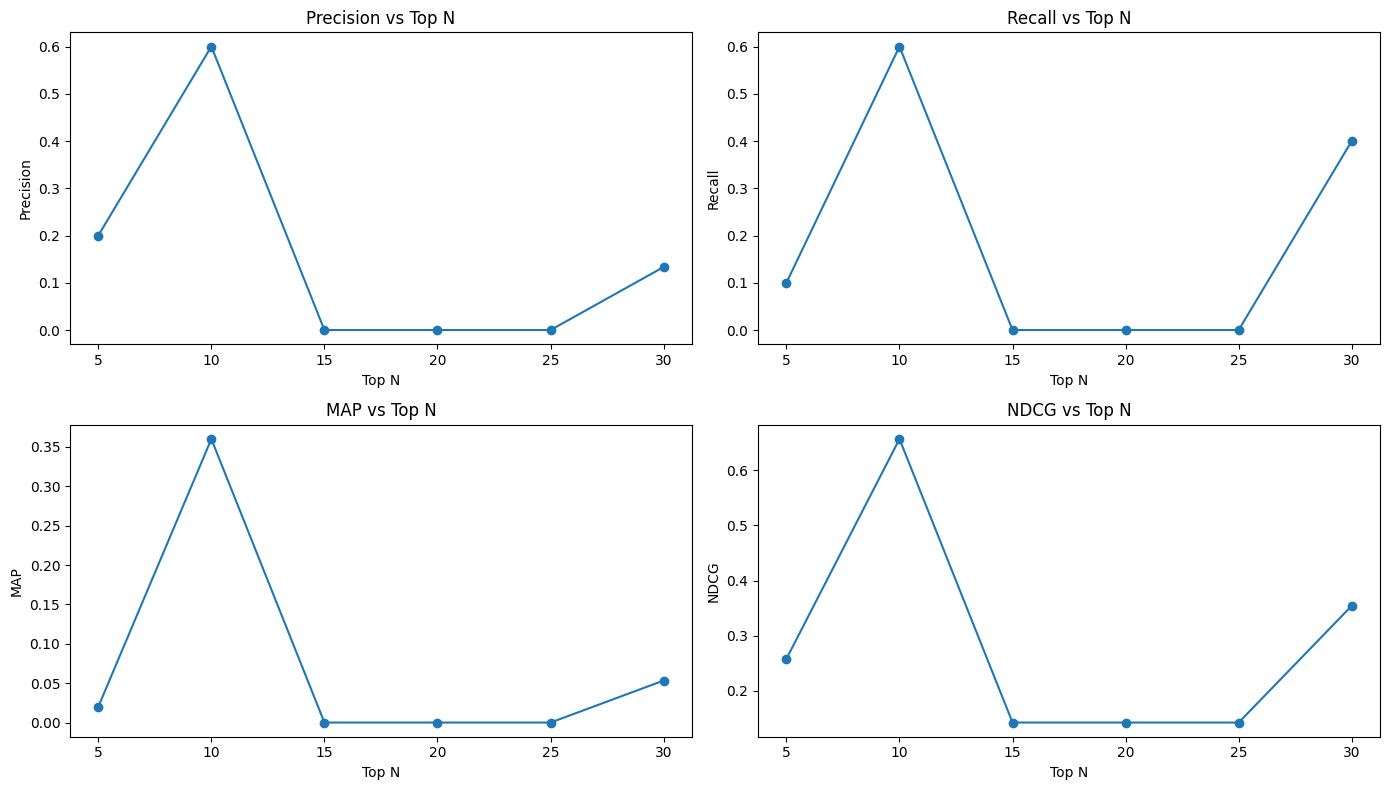

In [27]:
import matplotlib.pyplot as plt

# 测试不同的 top_n 值
top_n_values = [5, 10, 15, 20, 25, 30]
precision_scores = []
recall_scores = []
avg_precision_scores = []
ndcg_scores = []

for top_n in top_n_values:
    # 使用测试集中的随机播放列表作为 ground truth
    test_random_users = random.sample(list(test_df['user_id'].unique()), 10)
    test_user_playlists = test_df[test_df['user_id'].isin(test_random_users)]
    test_unique_playlists = test_user_playlists[['playlistname']].drop_duplicates()
    test_random_playlists = test_unique_playlists.sample(n=10, replace=False)

    # 合并测试随机播放列表中的所有关键词
    test_random_playlists_keywords = ' '.join(playlist_tracks[playlist_tracks['playlistname'].isin(test_random_playlists['playlistname'])]['keywords'].tolist())

    # 推荐基于测试随机播放列表关键词的播放列表
    test_recommended_playlists = recommend_playlists_based_on_keywords(test_random_playlists_keywords, playlist_tracks, tfidf_vectorizer, top_n=top_n)

    # 创建真实标签和推荐标签
    true_labels = create_true_labels(playlist_tracks, test_random_playlists)
    pred_labels = create_pred_labels(test_recommended_playlists, playlist_tracks)

    # 计算评估指标
    precision, recall, avg_precision, ndcg = evaluate_recommendations(true_labels, pred_labels)
    precision_scores.append(precision)
    recall_scores.append(recall)
    avg_precision_scores.append(avg_precision)
    ndcg_scores.append(ndcg)

# 绘制评估指标随 top_n 值变化的图表
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(top_n_values, precision_scores, marker='o')
plt.title('Precision vs Top N')
plt.xlabel('Top N')
plt.ylabel('Precision')

plt.subplot(2, 2, 2)
plt.plot(top_n_values, recall_scores, marker='o')
plt.title('Recall vs Top N')
plt.xlabel('Top N')
plt.ylabel('Recall')

plt.subplot(2, 2, 3)
plt.plot(top_n_values, avg_precision_scores, marker='o')
plt.title('MAP vs Top N')
plt.xlabel('Top N')
plt.ylabel('MAP')

plt.subplot(2, 2, 4)
plt.plot(top_n_values, ndcg_scores, marker='o')
plt.title('NDCG vs Top N')
plt.xlabel('Top N')
plt.ylabel('NDCG')

plt.tight_layout()
plt.show()
